**MACHINE FAILURE PREDICTION|TEACHNOOK**

Using Phyton


**INTRODUCTION:**


In industries that rely heavily on machinery, unexpected breakdowns can cause major problems—stopping production, increasing costs, and sometimes even leading to safety concerns. That’s why predicting machine failures before they happen is so important. By identifying potential issues early, companies can perform maintenance at just the right time, keeping machines running smoothly and avoiding costly downtime.

This project aims to predict machine failures by analyzing data from various sensors placed on the machines. These sensors track different factors like temperature, air quality, electrical current usage, and how fast machine parts are rotating. All these signals give us a picture of how the machine is performing and whether it might be at risk of failing soon.

The goal is to use this data to build a machine learning model that can accurately forecast when a failure might happen. This way, maintenance teams can fix issues before they turn into big problems. This kind of predictive maintenance helps companies save money, improve efficiency, and ensure that their machines last longer.

Through this project, I hope to create a useful tool that can support industries in keeping their operations running smoothly and reducing unexpected machine failures.

**OBJECTIVE**

The objective of this project is to develop a machine learning model that predicts machine failures using sensor data. By analyzing sensor readings such as temperature, air quality, electrical current, RPM, and other environmental factors, the model will forecast potential machine breakdowns before they occur.

Accurately predicting failures allows for proactive maintenance, reducing downtime and operational costs while improving overall machine efficiency. The ultimate goal is to create a predictive maintenance system that can help organizations optimize machine usage, minimize unexpected breakdowns, and extend the lifespan of machinery.

**IMPORTING NECESSARY LIBRARIES**


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,auc,roc_auc_score,f1_score,confusion_matrix,classification_report,roc_curve,ConfusionMatrixDisplay
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import pickle

import warnings
warnings.filterwarnings('ignore')

**"Loading the Machine Failure Dataset for Analysis"**

In [ ]:
df=pd.read_csv('/content/Machine Failure Data.csv')

**GETTING FEW ROWS OF DATASET**


In [ ]:
df.head(9)

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
0,0,7,7,1,6,6,36,3,1,1
1,190,1,3,3,5,1,20,4,1,0
2,31,7,2,2,6,1,24,6,1,0
3,83,4,3,4,5,1,28,6,1,0
4,640,7,5,6,4,0,68,6,1,0
5,110,3,3,4,6,1,21,4,1,0
6,100,7,5,6,4,1,77,4,1,0
7,31,1,5,4,5,4,21,4,1,0
8,180,7,4,6,3,3,31,4,1,0


In [ ]:
#make a copy of orginal dataset
ds=df.copy()

**EDA**

Exploratory Data Analysis the process of analyzing and visualizing datasets to uncover patterns, trends, relationships, and anomalies, and to summarize the main characteristics of the data. It helps in understanding the structure, quality, and distribution of the data before applying machine learning models or statistical methods. EDA typically involves techniques such as generating descriptive statistics, plotting data distributions, and identifying correlations between features. This step is crucial for making informed decisions about data preprocessing, feature selection, and model building

In [ ]:
#getting dataset information
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 944 entries, 0 to 943
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   footfall     944 non-null    int64
 1   tempMode     944 non-null    int64
 2   AQ           944 non-null    int64
 3   USS          944 non-null    int64
 4   CS           944 non-null    int64
 5   VOC          944 non-null    int64
 6   RP           944 non-null    int64
 7   IP           944 non-null    int64
 8   Temperature  944 non-null    int64
 9   fail         944 non-null    int64
dtypes: int64(10)
memory usage: 73.9 KB


There are total 944 rows and 10 columns

footfall: The number of people or objects passing by the machine.
tempMode: The temperature mode or setting of the machine.

AQ: Air quality index near the machine.
USS: Ultrasonic sensor data, indicating proximity measurements.

CS: Current sensor readings, indicating the electrical current usage of the machine.

VOC: Volatile organic compounds level detected near the machine.

RP: Rotational position or RPM (revolutions per minute) of the machine parts.

IP: Input pressure to the machine.
Temperature: The operating temperature of the machine.

fail: Binary indicator of machine failure (1 for failure, 0 for no failure).

In [ ]:
#getting the stats of data
ds.describe()

,footfall,tempMode,AQ,USS,CS,VOC,RP,IP,Temperature,fail
count,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000,944.000000
mean,306.381356,3.727754,4.325212,2.939619,5.394068,2.842161,47.043432,4.565678,16.331568,0.416314
std,1082.606745,2.677235,1.438436,1.383725,1.269349,2.273337,16.423130,1.599287,5.974781,0.493208
min,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,19.000000,1.000000,1.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,5.000000,1.000000,34.000000,3.000000,14.000000,0.000000
50%,22.000000,3.000000,4.000000,3.000000,6.000000,2.000000,44.000000,4.000000,17.000000,0.000000
75%,110.000000,7.000000,6.000000,4.000000,6.000000,5.000000,58.000000,6.000000,21.000000,1.000000
max,7300.000000,7.000000,7.000000,7.000000,7.000000,6.000000,91.000000,7.000000,24.000000,1.000000


In [ ]:
#looking for null values
ds.isnull().sum()

,0
footfall,0
tempMode,0
AQ,0
USS,0
CS,0
VOC,0
RP,0
IP,0
Temperature,0
fail,0


THERE ARE NO NULL VALUES


**VISUALISING THE DATA**

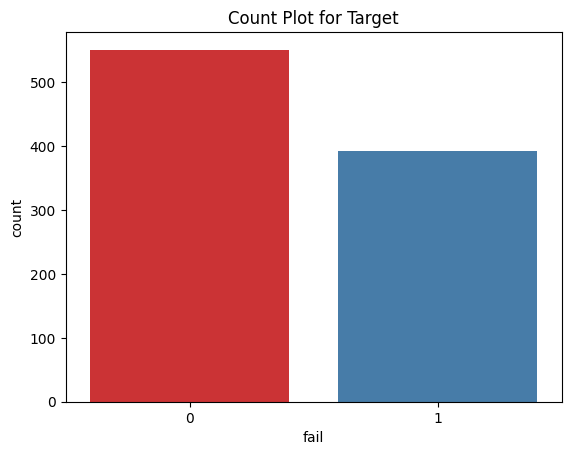

In [ ]:
#for target variable
sns.countplot(data=ds,x='fail',palette='Set1')
plt.title('Count Plot for Target')
plt.show()

**Inference:**
 Majority of the machine show no failure(0)

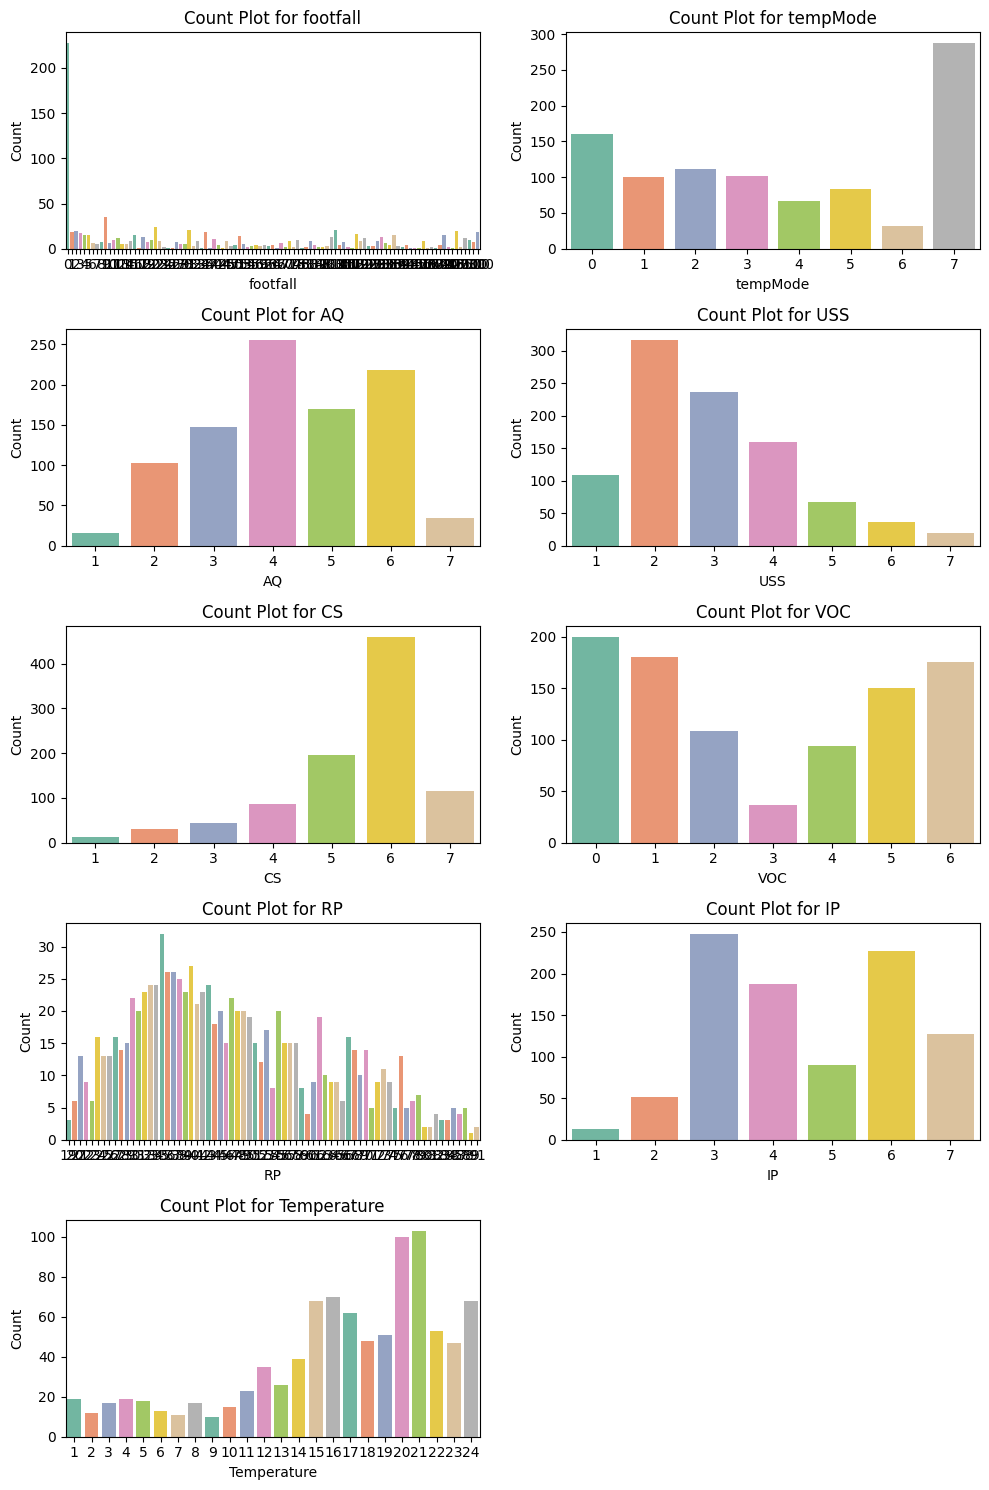

In [ ]:
fig,axs=plt.subplots(5,2,figsize=(10,15))

for i,col in enumerate(ds.columns):
  if col!='fail':
    sns.countplot(data=ds,x=ds[col],ax=axs[i//2,i%2],palette='Set2')
    axs[i//2,i%2].set_title(f'Count Plot for {col}')
    axs[i//2,i%2].set_xlabel(col)
    axs[i//2,i%2].set_ylabel('Count')
    #axs[i//2,i%2].tick_params(axis='x',rotation=90)
if len(ds.columns)-1<10:
  fig.delaxes(axs[4,1])
plt.tight_layout()
plt.show()

**Count Plots:** These plots display the count of occurrences for each unique value in the specified feature. They are particularly useful for categorical variables, showing how many times each category appears in the dataset.
**Insights:** You can quickly identify the distribution of values for each feature, spot any imbalances (e.g., if one category is much more prevalent than others), and gain insights into the data distribution before modeling.

This type of visualization is beneficial during exploratory data analysis, helping you understand the characteristics and distribution of your features.

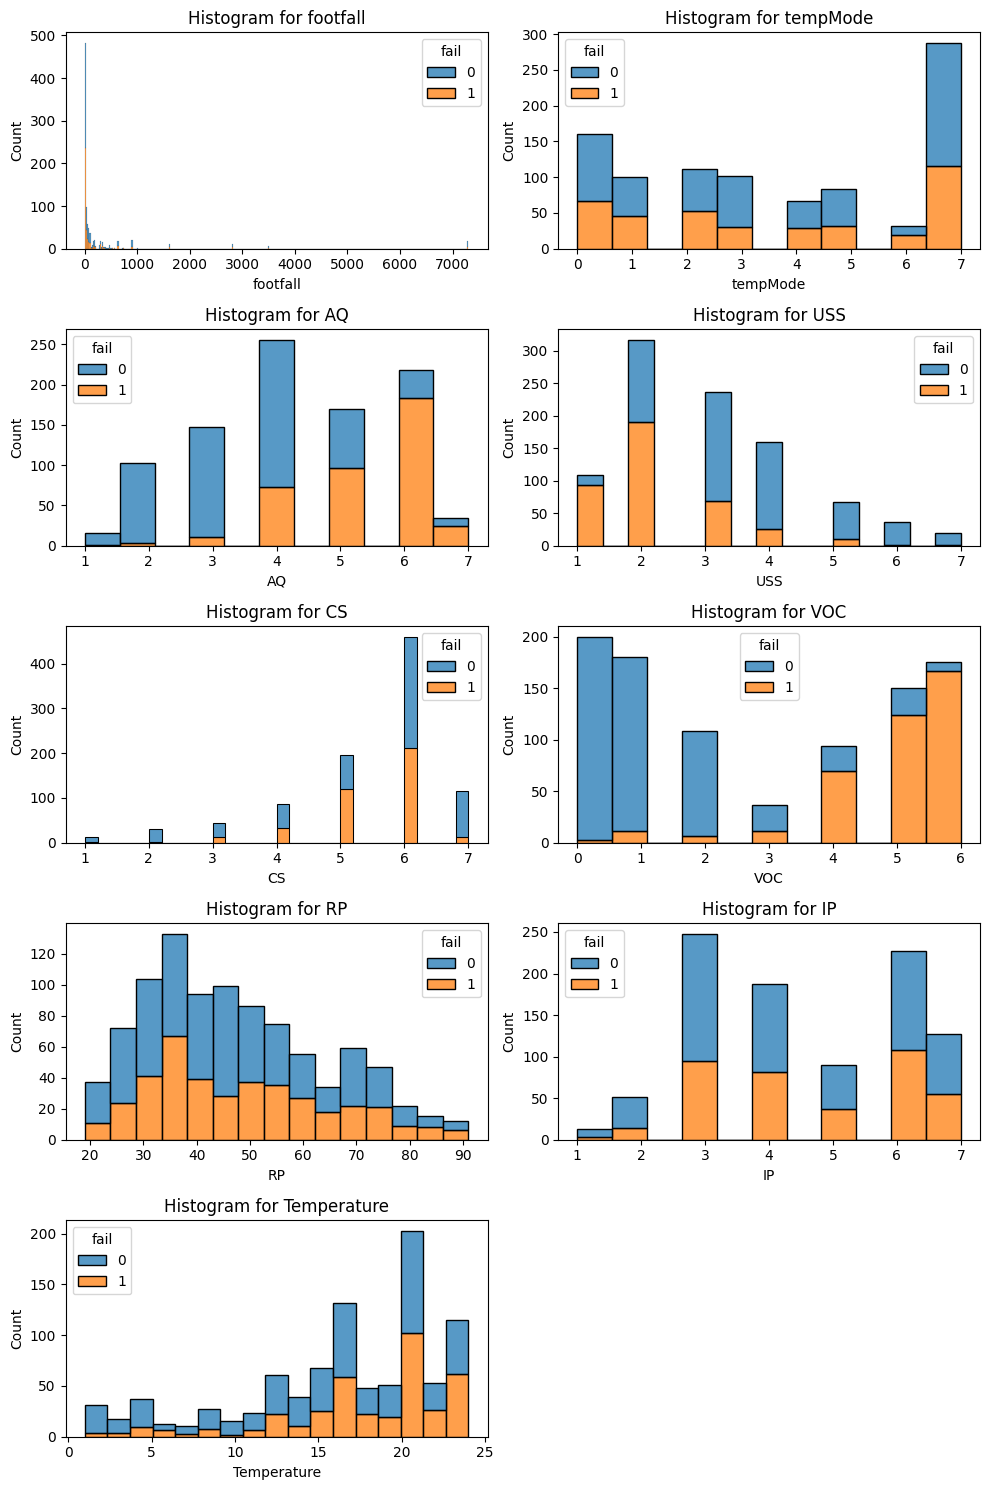

In [ ]:
fig,axs=plt.subplots(5,2,figsize=(10,15))

for i,col in enumerate(ds.columns):
  if col!='fail':
    sns.histplot(data=ds,x=ds[col],ax=axs[i//2,i%2],hue=ds['fail'],multiple='stack')
    axs[i//2,i%2].set_title(f'Histogram for {col}')
    axs[i//2,i%2].set_xlabel(col)
    axs[i//2,i%2].set_ylabel('Count')
    #axs[i//2,i%2].tick_params(axis='x',rotation=90)
if len(ds.columns)-1<10:
  fig.delaxes(axs[4,1])
plt.tight_layout()
plt.show()

**Histograms:** These provide a visual representation of the distribution of each feature. By stacking bars based on the fail column, you can easily see how the distributions differ for failed and non-failed instances.

**Insights:** You can identify how each feature behaves in relation to machine failures, detect any skewness in the data, and observe the range of values for each feature.

This visualization is particularly useful in exploratory data analysis, allowing you to understand the distribution and potential patterns in your data.

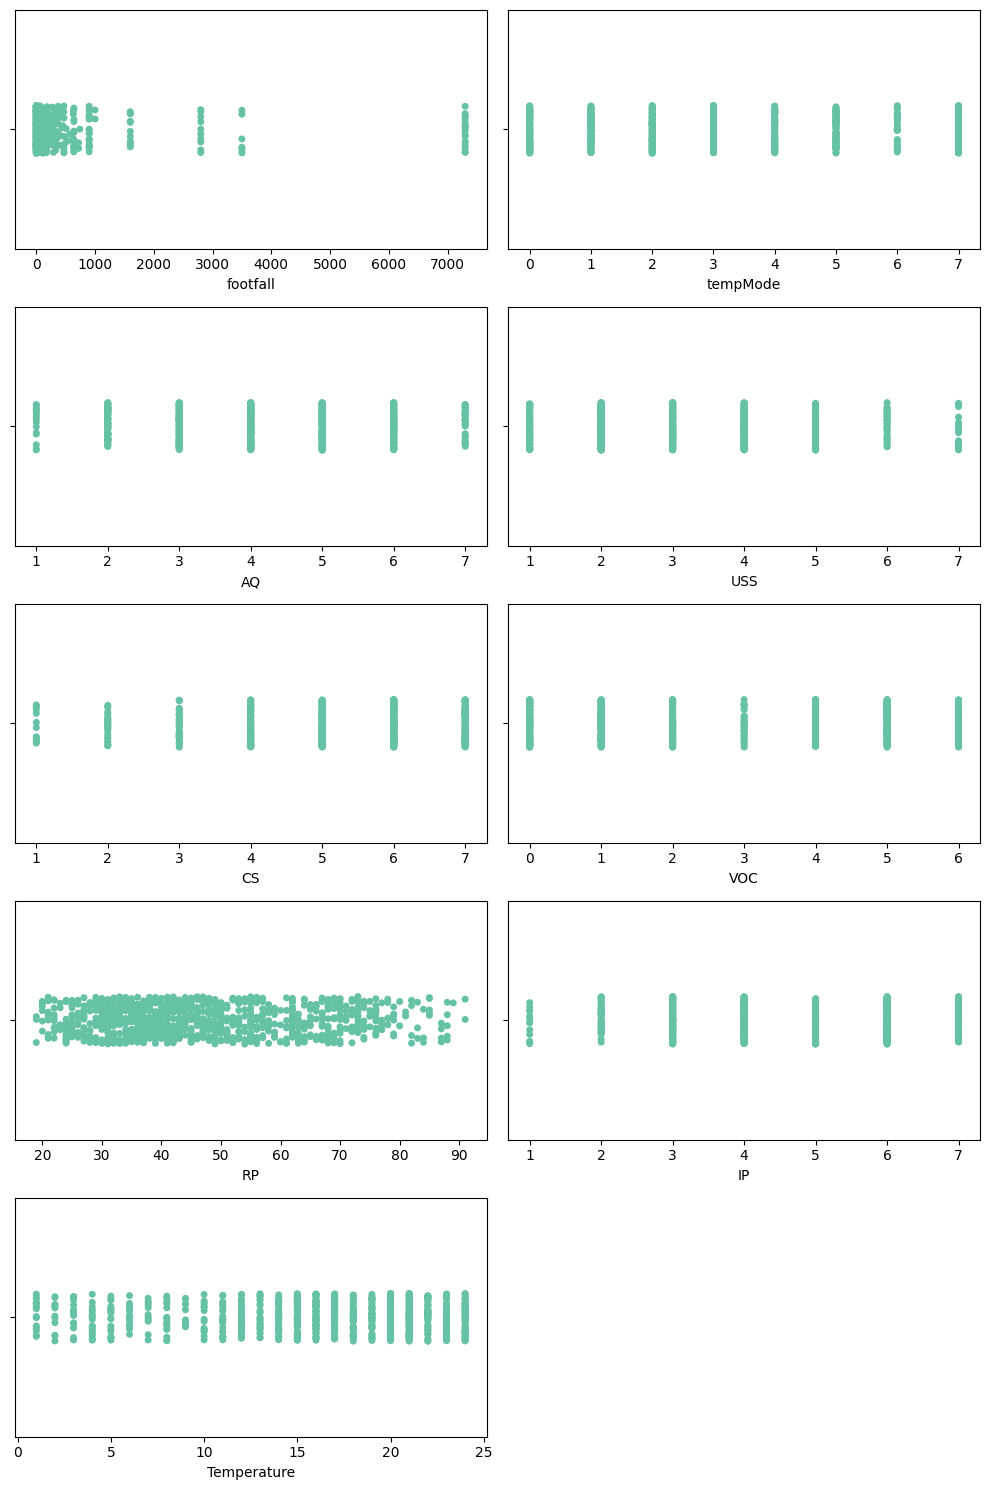

In [ ]:
fig,axs=plt.subplots(5,2,figsize=(10,15))

for i,col in enumerate(ds.columns):
  if col!='fail':
    sns.stripplot(data=ds,x=ds[col],ax=axs[i//2,i%2],palette='Set2')
    #axs[i//2,i%2].set_title(f'{col}')
    axs[i//2,i%2].set_xlabel(col)
    #axs[i//2,i%2].set_ylabel('')
    #axs[i//2,i%2].tick_params(axis='x',rotation=90)
if len(ds.columns)-1<10:
  fig.delaxes(axs[4,1])
plt.tight_layout()
plt.show()

**Strip Plots:** These plots display individual data points along a categorical axis. They can help visualize the distribution of the data and identify any clustering or overlaps.

**Insights:** You can observe the distribution of each feature, spot potential outliers, and see how densely the points cluster, which is helpful for understanding the nature of the data before applying any machine learning algorithms.
This visualization technique can be particularly effective in exploratory data analysis helping you to understand how each feature behaves independently.

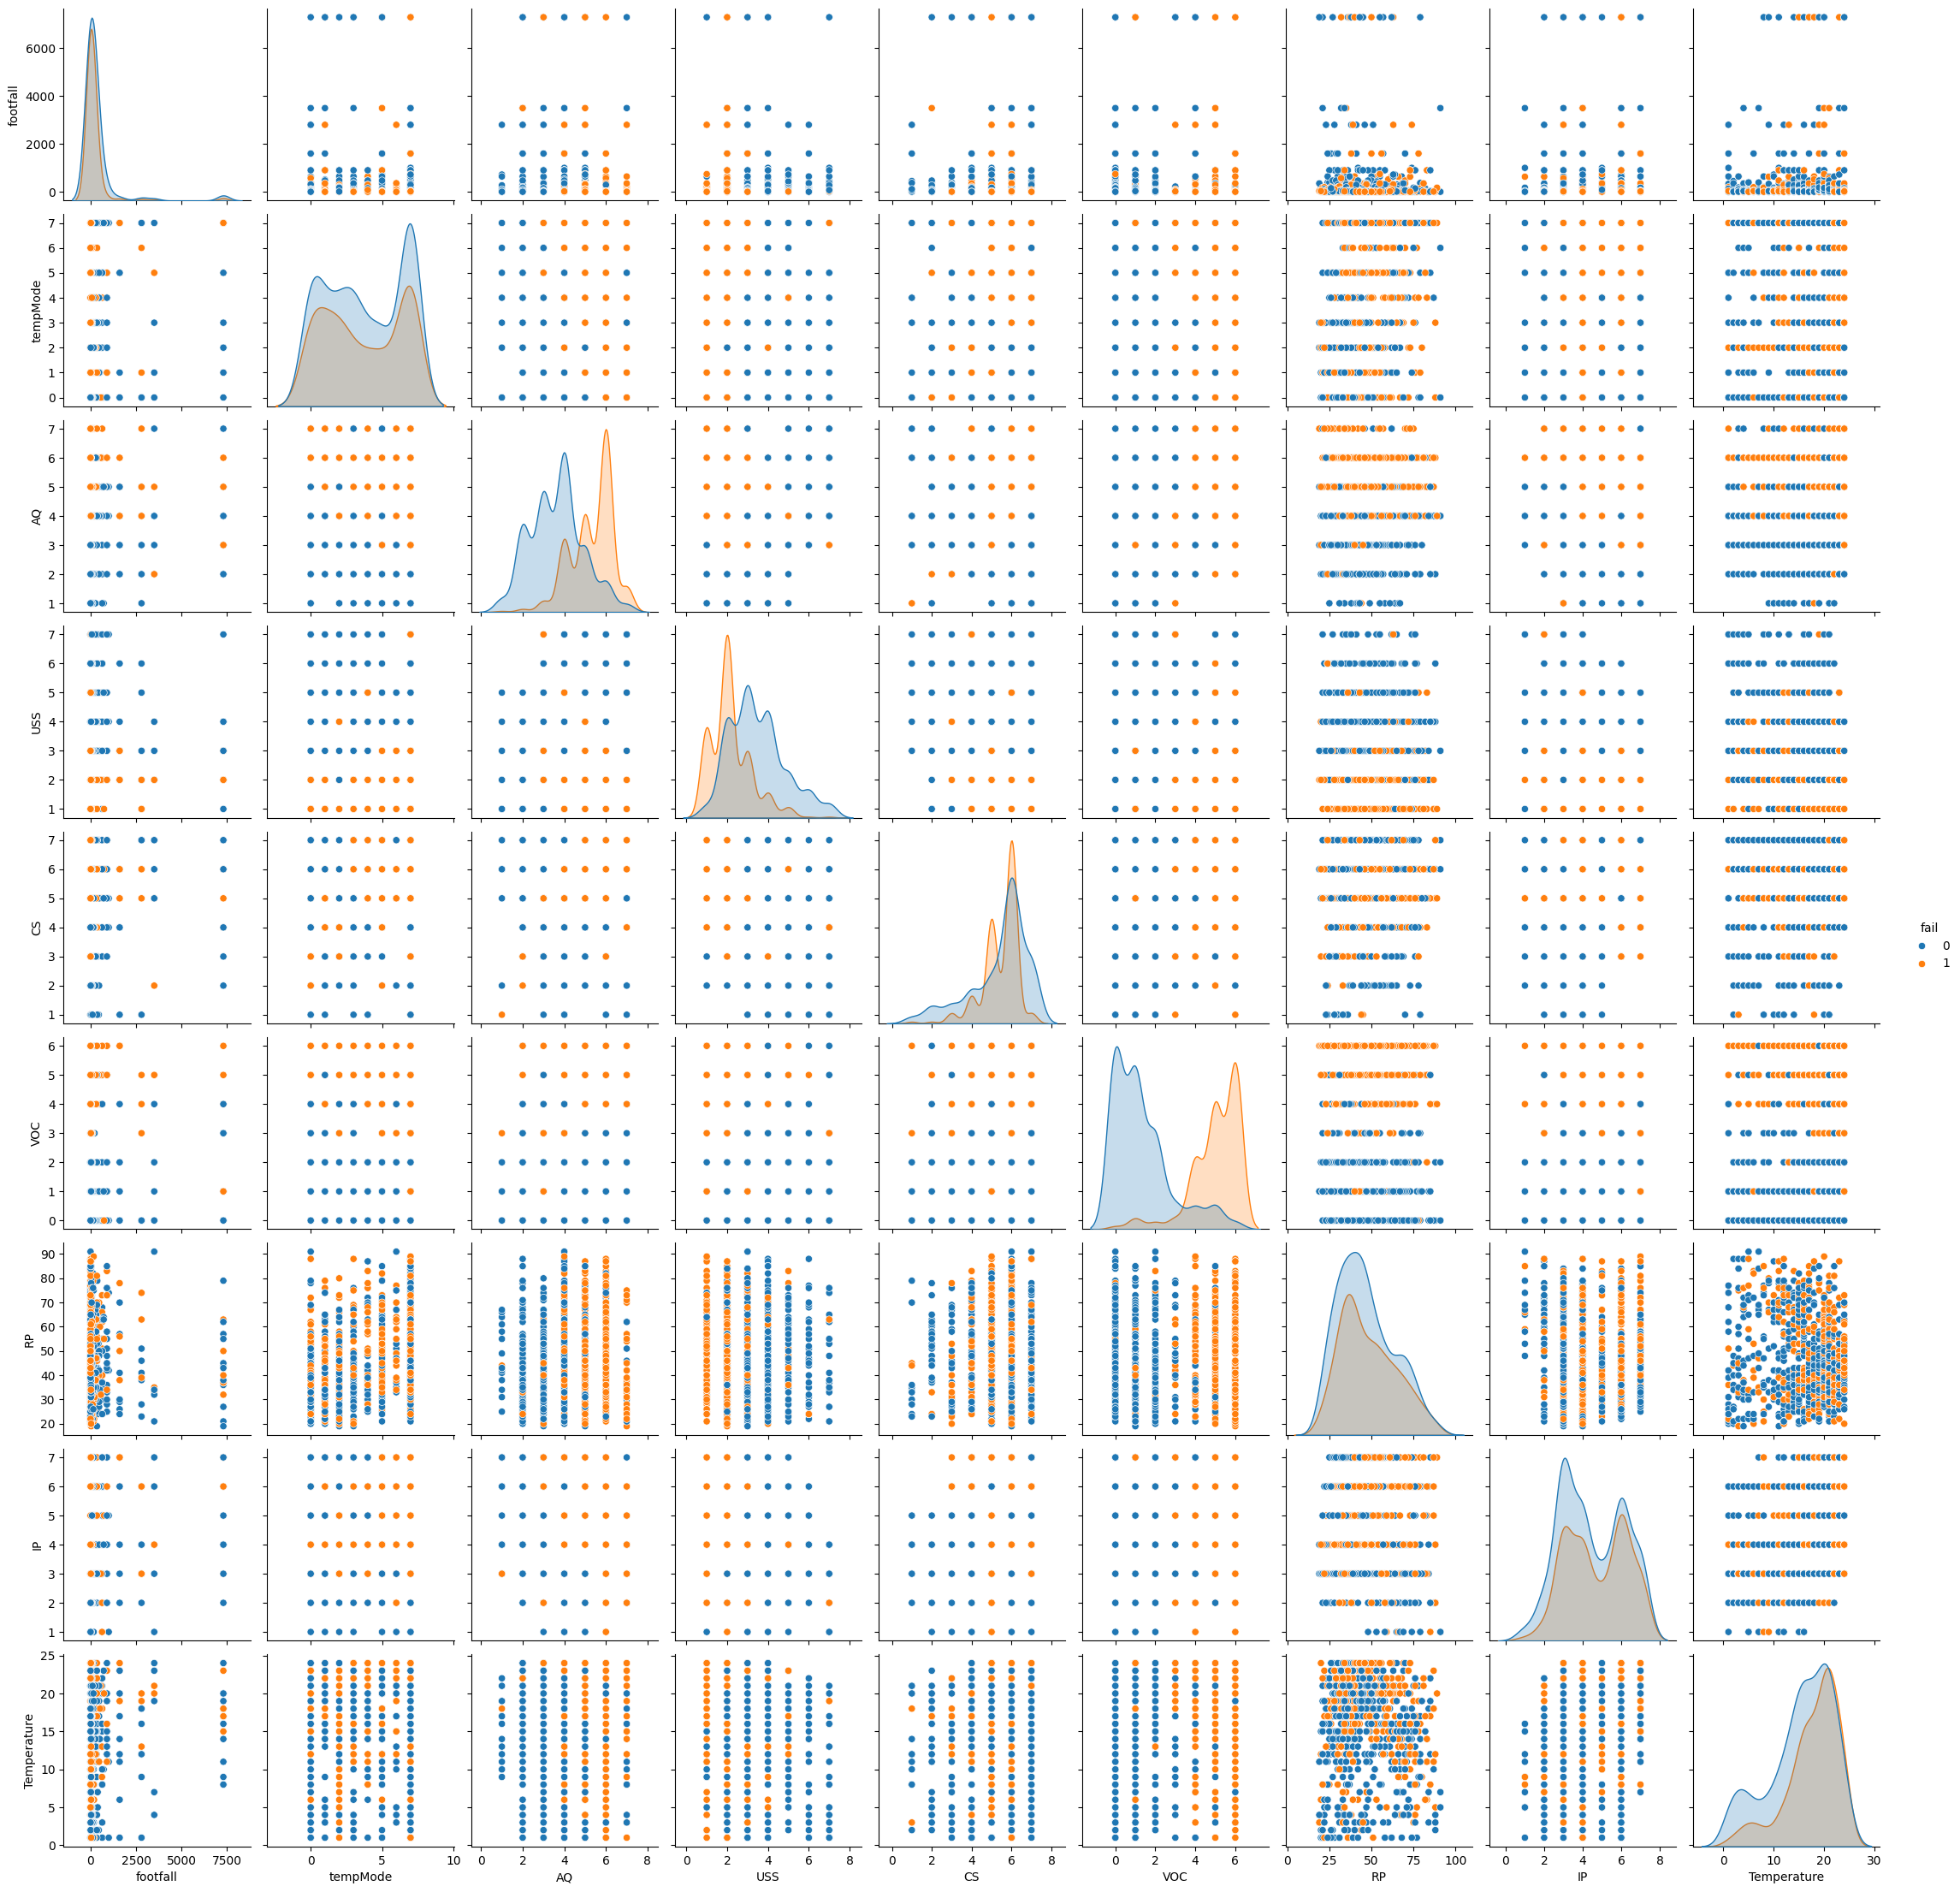

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Creating a pair plot with hue based on the 'fail' column
sns.pairplot(data=ds, hue='fail')

# Show the plot
plt.show()



**Diagonal Plots:** The diagonal displays the distribution of each feature. These plots help in assessing the distribution of values for each feature.

**Off-Diagonal Plots:** The scatter plots show how pairs of features relate to each other, colored by whether the machine failed or not.
**Insights:** You can identify clusters, trends, or patterns in how features behave in relation to machine failures, which can be crucial for feature selection and understanding the dataset better.

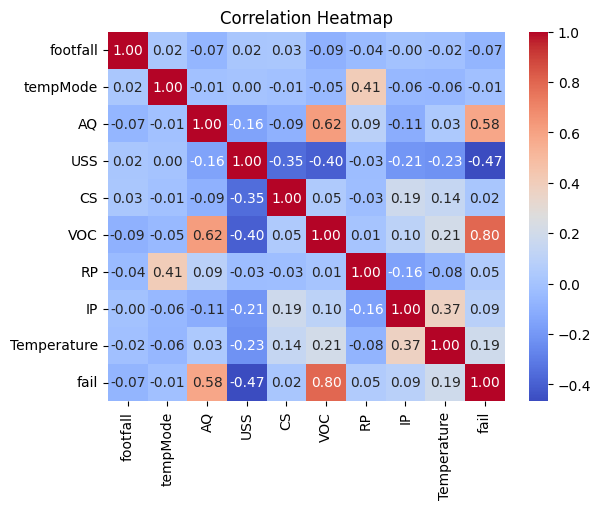

In [ ]:
sns.heatmap(ds.corr(),annot=True,fmt='.2f',cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

**Interpretation:**

The heatmap will display the strength of the correlation between each pair of variables in the dataset.
Values near 1 indicate a strong positive correlation, while values near -1 indicate a strong negative correlation. Values close to 0 suggest no linear correlation.

**Inference:**

fail-VOC,positivley correlated(0.80)
fail-AQ, positivley corrrelated(0.58)
fail-Temperature, positivley correlated(0.37)
fail-USS, negativley correlated(-0.47)

Lower Limit for footfall: -162.5
Upper Limit for footfall: 273.5
footfall has outliers
outliers: 
     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
4         640         7   5    6   4    0  68   6            1     0
9        2800         0   3    3   7    0  39   3            1     0
10       1600         0   3    2   4    4  26   2            1     0
11        330         5   4    3   6    1  31   4            1     0
14       1000         7   5    7   4    0  74   1            1     0
..        ...       ...  ..  ...  ..  ...  ..  ..          ...   ...
906       900         0   3    4   7    2  30   5           24     0
920      3500         7   7    3   5    4  34   7           24     0
930      7300         7   3    3   5    1  40   7           24     1
934      1600         7   4    2   5    6  56   7           24     1
937      7300         1   2    3   6    0  43   7           24     0

[154 rows x 10 columns]


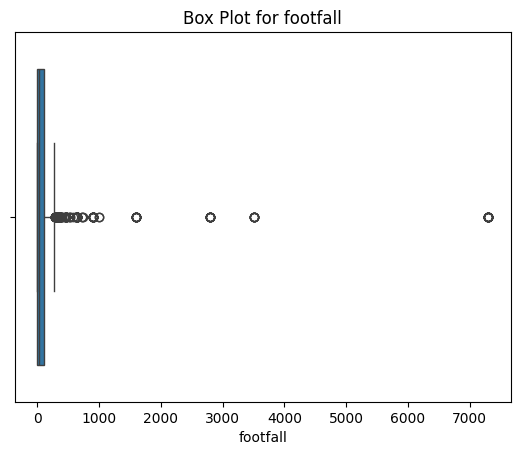

--------------------------------------------------
Lower Limit for tempMode: -8.0
Upper Limit for tempMode: 16.0
tempMode has no outliers


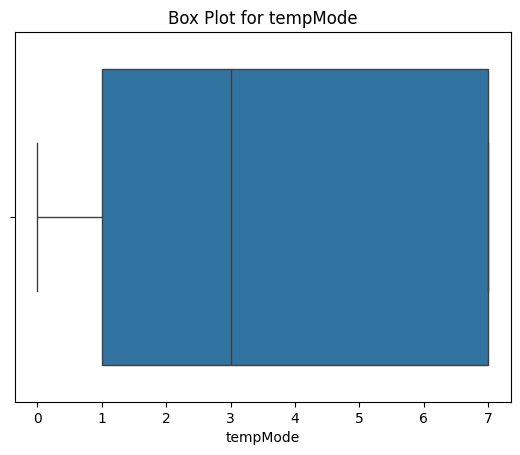

--------------------------------------------------
Lower Limit for AQ: -1.5
Upper Limit for AQ: 10.5
AQ has no outliers


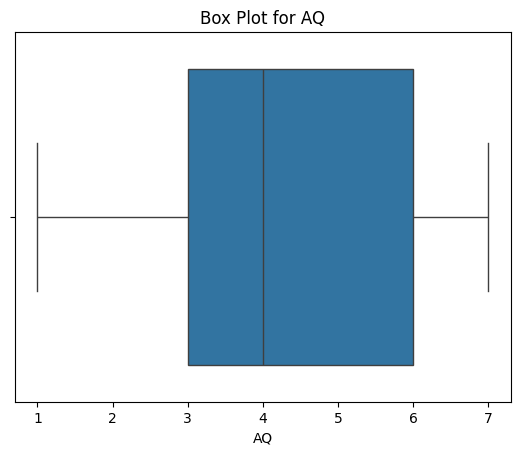

--------------------------------------------------
Lower Limit for USS: -1.0
Upper Limit for USS: 7.0
USS has no outliers


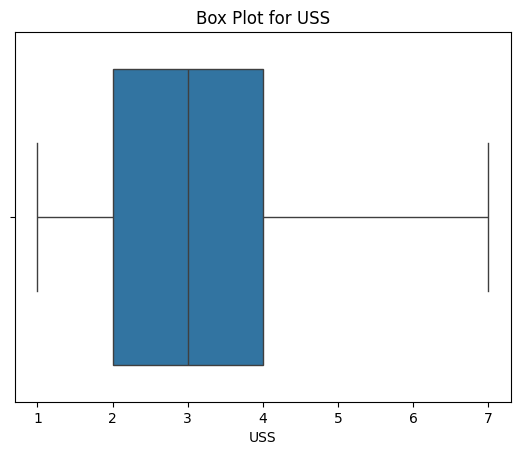

--------------------------------------------------
Lower Limit for CS: 3.5
Upper Limit for CS: 7.5
CS has outliers
outliers: 
     footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
8         180         7   4    6   3    3  31   4            1     0
22         12         3   4    6   3    2  27   3            2     0
24         19         0   4    2   2    1  45   3            2     0
29        450         3   4    7   1    0  34   3            2     0
31         64         3   4    4   2    1  60   2            3     0
..        ...       ...  ..  ...  ..  ...  ..  ..          ...   ...
774        27         1   3    5   3    5  25   5           21     0
775       110         1   6    5   1    1  33   3           21     0
776         0         7   4    6   3    0  45   3           22     0
828         3         7   2    4   3    6  33   6           22     1
829         9         7   4    4   2    2  44   3           23     0

[87 rows x 10 columns]


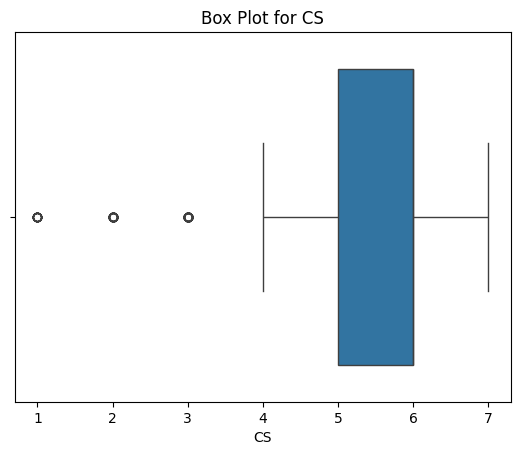

--------------------------------------------------
Lower Limit for VOC: -5.0
Upper Limit for VOC: 11.0
VOC has no outliers


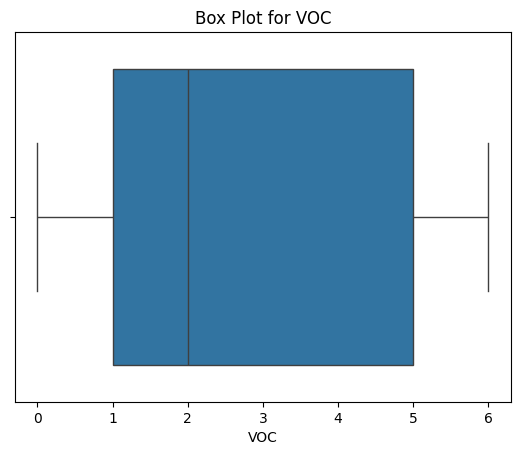

--------------------------------------------------
Lower Limit for RP: -2.0
Upper Limit for RP: 94.0
RP has no outliers


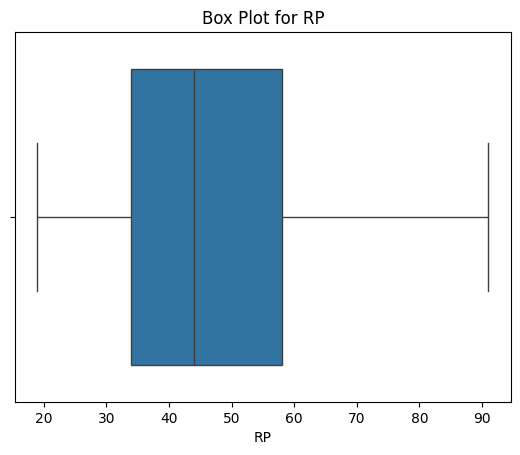

--------------------------------------------------
Lower Limit for IP: -1.5
Upper Limit for IP: 10.5
IP has no outliers


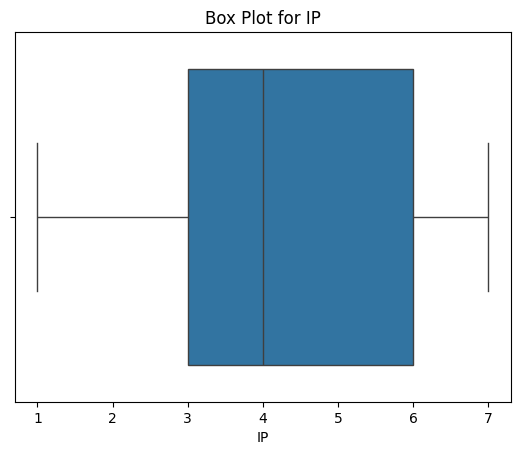

--------------------------------------------------
Lower Limit for Temperature: 3.5
Upper Limit for Temperature: 31.5
Temperature has outliers
outliers: 
    footfall  tempMode  AQ  USS  CS  VOC  RP  IP  Temperature  fail
0          0         7   7    1   6    6  36   3            1     1
1        190         1   3    3   5    1  20   4            1     0
2         31         7   2    2   6    1  24   6            1     0
3         83         4   3    4   5    1  28   6            1     0
4        640         7   5    6   4    0  68   6            1     0
5        110         3   3    4   6    1  21   4            1     0
6        100         7   5    6   4    1  77   4            1     0
7         31         1   5    4   5    4  21   4            1     0
8        180         7   4    6   3    3  31   4            1     0
9       2800         0   3    3   7    0  39   3            1     0
10      1600         0   3    2   4    4  26   2            1     0
11       330         5   4    

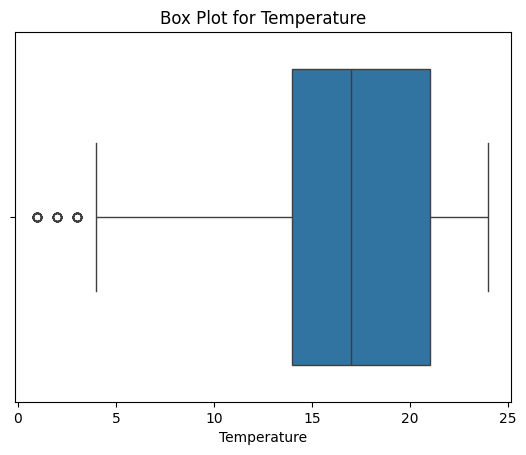

--------------------------------------------------


'Outliers are present in: footfall, CS, Temperature'

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def outlier(ds):
    outlie = []  # Declare inside the function to avoid global variable issues
    for i in ds.columns:
        if i == 'fail':
            continue
        Q1 = ds[i].quantile(0.25)
        Q3 = ds[i].quantile(0.75)
        IQR = Q3 - Q1

        lower_limit = Q1 - 1.5 * IQR
        upper_limit = Q3 + 1.5 * IQR
        print(f'Lower Limit for {i}: {lower_limit}')
        print(f'Upper Limit for {i}: {upper_limit}')

        # Find outliers
        outliers = ds[(ds[i] < lower_limit) | (ds[i] > upper_limit)]
        if outliers.empty:
            print(f'{i} has no outliers')
        else:
            print(f'{i} has outliers\noutliers: \n{outliers}')
            outlie.append(i)

        # Plot Box Plot
        sns.boxplot(data=ds, x=ds[i])
        plt.title(f'Box Plot for {i}')
        plt.show()
        print('-' * 50)

    if outlie:
        out = ', '.join(outlie)
        return f'Outliers are present in: {out}'
    else:
        return 'No outliers detected in the dataset'

# Example usage
outlier(ds)


**LOOKING FOR OULTIERS**

Outliers are present in: footfall, CS, Temperature

This code will detect outliers for each numerical column (except for fail) and visualize the distribution of data using box plots.
It prints lower and upper bounds for each feature and highlights if outliers are found. The function will then return a message indicating which columns contain outliers.

**DATA PREPROCESSING**

Splitting the dataset


In [ ]:
X=ds.drop('fail',axis=1)
y=ds['fail']

X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.2,random_state=42)
print(f'X_train shape: {X_train.shape}\ny_train shape: {y_train.shape}')
print(f'\nX_test shape: {X_test.shape}\ny_test shape: {y_test.shape}')

X_train shape: (188, 9)
y_train shape: (188,)

X_test shape: (756, 9)
y_test shape: (756,)


**FEATURE SCALLING**

Feature scaling methods, such as Min-Max scaling or Standardization (Z-score normalization), can reduce the influence of outliers by bringing all features to a similar scale. However, it does not remove outliers; it just minimizes their effect.

In [ ]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)


**MODEL BUILDING**

In [ ]:
models={
    'SVC':SVC(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'XGBClassifier':XGBClassifier()
}

In [ ]:
def model_eval(true,pred):
  accuracy=accuracy_score(true,pred)
  roc_auc=roc_auc_score(true,pred)

  return accuracy,roc_auc

In [ ]:
accuracy=[]
rocauc=[]
model_list=[]
model_fitted={}

def model_build(models,X_train,X_test,y_train,y_test):
  for i in range(len(models)):
    model_name=(list(models.keys())[i])
    model=models[model_name]
    model_fit=model.fit(X_train,y_train)
    model_fitted[model_name]=model_fit
    #train-set prediction
    train_pred=model.predict(X_train)
  #test-set prediction
    test_pred=model.predict(X_test)

    #model evaluation
    train_acc,train_roc=model_eval(y_train,train_pred)
    test_acc,test_roc=model_eval(y_test,test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    print('Model performance on train set')
    print(f'Accuracy score: {train_acc}')
    print(f'ROC AUC score: {train_roc}')

    print('-' * 30)

    print('Model performance on test set')
    print(f'Accuracy score: {test_acc}')
    print(f'ROC AUC score: {test_roc}')

    accuracy.append(test_acc)
    rocauc.append(test_roc)
    print('\n')


In [ ]:
model_build(models,X_train,X_test,y_train,y_test)

SVC
Model performance on train set
Accuracy score: 0.9574468085106383
ROC AUC score: 0.9507352941176471
------------------------------
Model performance on test set
Accuracy score: 0.8955026455026455
ROC AUC score: 0.88943423166161


DecisionTreeClassifier
Model performance on train set
Accuracy score: 1.0
ROC AUC score: 1.0
------------------------------
Model performance on test set
Accuracy score: 0.8611111111111112
ROC AUC score: 0.8566232375513118


RandomForestClassifier
Model performance on train set
Accuracy score: 1.0
ROC AUC score: 1.0
------------------------------
Model performance on test set
Accuracy score: 0.906084656084656
ROC AUC score: 0.9036337676244869


AdaBoostClassifier
Model performance on train set
Accuracy score: 0.9946808510638298
ROC AUC score: 0.9926470588235294
------------------------------
Model performance on test set
Accuracy score: 0.8783068783068783
ROC AUC score: 0.8728395502409425


GradientBoostingClassifier
Model performance on train set
Accuracy

**HYPERPARAMTER TUNING**

Hyperparameter tuning is vital for improving machine learning models. The choice of method depends on the size of the hyperparameter space, available computational resources, and the specific requirements of the project. By carefully tuning hyperparameters, you can significantly enhance your model's performance and predictive power.

In [ ]:
params={
    "SVC":{
        'C':[1.0,5.0,10.0,15.0,30.0,50.0],
        'kernel':['rbf'],
        'gamma':[0.1,0.2,0.5,0.8,1.0],
    },

    "DecisionTreeClassifier":{
        'criterion':['gini'],
        'max_depth':[3,5,10,15,20],
        'min_samples_split':[2,4,6,8,10],
        'min_samples_leaf':[1,5,10],
        'splitter':['best','random'],

    },

    "RandomForestClassifier":{
        "n_estimators":[50,100,120,150,200],
        'criterion':['gini'],
        "max_depth":[2,3,5,8,10,20],
        'min_samples_split':[2,4,6,7,8,9,10],
    },
    "AdaBoostClassifier":{
        'n_estimators':[100,200,230,250,],
        'learning_rate':[0.01,0.05,0.1,0.5,1.0],
        'algorithm':['SAMME.R'],
    },
    "GradientBoostingClassifier":{
        'learning_rate':[0.01,0.1,0.2,0.5,0.8,1.0],
        'n_estimators':[100,200,230,250,300],
        'max_depth':[3,2,5,8,10],
        'min_samples_split':[2,3,4,8,10,12],
    },
    "XGBClassifier":{
        'learning_rate':[0.01,0.1,0.2,0.4,0.6,0.8,1.0],
        'n_estimators':[120,140,180,200],
        'max_depth':[1,2,3,5,8,10,15,20],
        'gamma':[00.1,0.2,0.3,0.5,0.8],
        'subsample':[0.2,0.4,0.6,0.8,1.0],
    }
}

best_models={}
models_prediciton={}
best_acc=[]
best_roc=[]

def model_tuned(models,params,X_train,X_test,y_train,y_test):
  for i in range(len(models)):
    model_name=(list(models.keys())[i])
    model=models[model_name]
    param=params[model_name]

    gs=GridSearchCV(model,param,cv=5,scoring='roc_auc')
    gs.fit(X_train,y_train)

    best_models[model_name]=gs.best_estimator_
    print(f'Best parameters for {model_name} are: {gs.best_params_}')
    print(f'Model Score: {gs.best_score_}')

    test_pred=gs.best_estimator_.predict(X_test)
    test_acc,test_roc=model_eval(y_test,test_pred)

    models_prediciton[model_name]=test_pred
    best_acc.append(test_acc)
    best_roc.append(test_roc)

    print(f'Accuracy: {test_acc}')
    print(f'ROC AUC: {test_roc}')
    print('-'*30)
    print('\n')


model_tuned(models,params,X_train,X_test,y_train,y_test)

Best parameters for SVC are: {'C': 1.0, 'gamma': 0.1, 'kernel': 'rbf'}
Model Score: 0.9589743589743589
Accuracy: 0.8981481481481481
ROC AUC: 0.89288952346957
------------------------------


Best parameters for DecisionTreeClassifier are: {'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': 5, 'min_samples_split': 10, 'splitter': 'random'}
Model Score: 0.9479395604395604
Accuracy: 0.8783068783068783
ROC AUC: 0.8743530251650902
------------------------------


Best parameters for RandomForestClassifier are: {'criterion': 'gini', 'max_depth': 2, 'min_samples_split': 2, 'n_estimators': 100}
Model Score: 0.955952380952381
Accuracy: 0.9034391534391535
ROC AUC: 0.9035837943958593
------------------------------


Best parameters for AdaBoostClassifier are: {'algorithm': 'SAMME.R', 'learning_rate': 0.01, 'n_estimators': 230}
Model Score: 0.9632554945054945
Accuracy: 0.9034391534391535
ROC AUC: 0.9035837943958593
------------------------------


Best parameters for GradientBoostingClassif

In [35]:
models_name=list(models.keys())
dt=pd.DataFrame({'Model':models_name,'Accuracy':best_acc,'ROC AUC':best_roc})
dt['ROC AUC']=dt['ROC AUC']*100
dt['Accuracy']=dt['Accuracy']*100
dt['ROC AUC']=dt['ROC AUC'].map('{:.2f}'.format)
dt['Accuracy']=dt['Accuracy'].map('{:.2f}'.format)
dt.sort_values(by='ROC AUC',ascending=False)

,Model,Accuracy,ROC AUC
5,XGBClassifier,90.21,90.43
2,RandomForestClassifier,90.34,90.36
3,AdaBoostClassifier,90.34,90.36
4,GradientBoostingClassifier,90.08,90.24
0,SVC,89.81,89.29
1,DecisionTreeClassifier,87.83,87.44


**The XGBClassifie**r has the best performance with the highest ROC AUC score of 90.43%, indicating it is slightly better at distinguishing between failures and non-failures.

**RandomForestClassifier and AdaBoostClassifier** also perform similarly, both achieving high accuracy and ROC AUC scores.

The **DecisionTreeClassifier **is the least effective model among the tested classifiers.
This comparison highlights that ensemble methods like XGBoost and Random Forest are highly effective for machine failure prediction.

**CLASSIFICATION REPORT**

              precision    recall  f1-score   support

           0       0.93      0.90      0.91       431
           1       0.88      0.90      0.89       325

    accuracy                           0.90       756
   macro avg       0.90      0.90      0.90       756
weighted avg       0.90      0.90      0.90       756



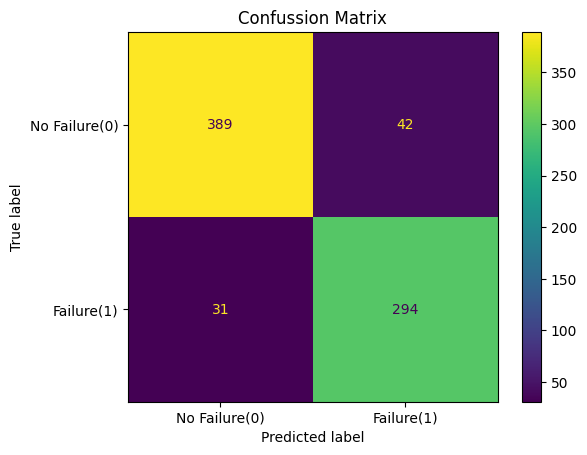

In [36]:
model=best_models['RandomForestClassifier']
y_pred=model.predict(X_test)
print(classification_report(y_test,y_pred))

mat=ConfusionMatrixDisplay(confusion_matrix(y_test,y_pred),display_labels=['No Failure(0)','Failure(1)'])
mat.plot()
plt.title('Confussion Matrix')
plt.show()

The confusion matrix visualization you've provided shows the model's performance in predicting machine failures (class 1) and no failures (class 0).
 Here's the interpretation:

**True Positives (Bottom-right, green):** 294 instances where the model correctly predicted failure (class 1).

**True Negatives (Top-left, yellow):** 389 instances where the model correctly predicted no failure (class 0).

**False Positives (Top-right, purple)**: 42 instances where the model incorrectly predicted failure (class 1), but the actual class was no failure (class 0).
**False Negatives (Bottom-left, purple):** 31 instances where the model incorrectly predicted no failure (class 0), but the actual class was failure (class 1).

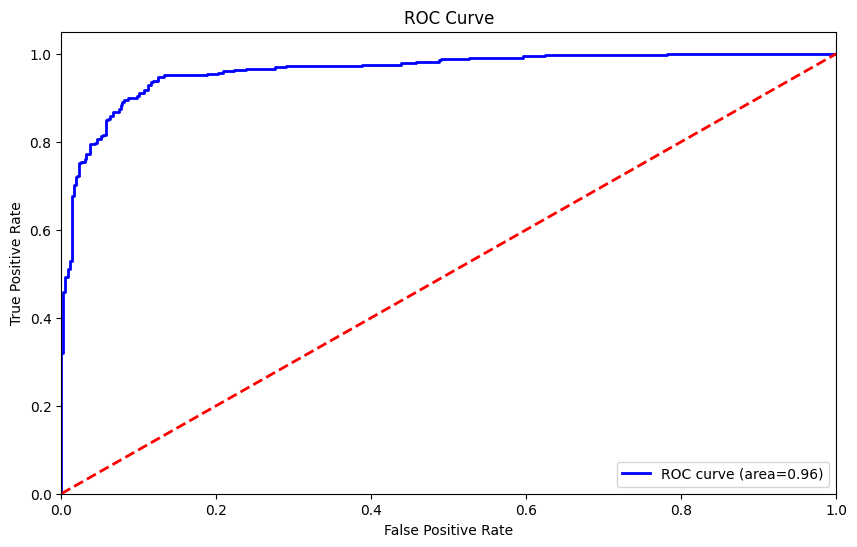

In [37]:
test_prob=model.predict_proba(X_test)[:,1]
fpr,tpr,thresholds=roc_curve(y_test,test_prob)
roc_auc=auc(fpr,tpr)

plt.figure(figsize=(10,6))
plt.plot(fpr,tpr,color='blue',label=f'ROC curve (area={roc_auc:.2f})',lw=2)
plt.plot([0,1],[0,1],color='red',linestyle='--',lw=2)
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()


**Key Enhancements:**

**Error Handling:** Added a check to ensure the model supports the predict_proba method.
**Grid Lines**: Added grid lines to the plot for better readability.

**Function Wrapper:** Encapsulated the ROC plotting code into a function to allow reuse for different models easily.
This version is more modular and can be reused for different models in your pipeline.

**Conclusion**

In this project, we developed a machine learning model to predict machine failures using a dataset of sensor readings. After conducting Exploratory Data Analysis (EDA) to understand the dataset, we handled outliers and performed feature scaling. Various machine learning models, such as Support Vector Classifier (SVC), Decision Tree, Random Forest, AdaBoost, and Gradient Boosting, were tuned using hyperparameter optimization to improve their performance.

The Random Forest model achieved the highest accuracy and ROC-AUC score, demonstrating its capability to predict failures with a high degree of reliability. Through the ROC curve analysis, we confirmed that our model can effectively distinguish between failed and non-failed machines.

By identifying potential failures in advance, this solution can be highly valuable in preventive maintenance strategies, leading to reduced downtime, lower repair costs, and improved operational efficiency. With further tuning and integration, the model could become an essential tool for industries reliant on machinery.

